In [1]:
import tweepy
import json
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

# Import and Initialize Sentiment Analyzer.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
consumer_key = "ltSOL1HiIpQBsElJOh1fnB81n"
consumer_secret = "pnYQcT5Nx41dAOqz7cq9zoAIdPTGjwDpelVuEWiTV563ykQF6x"
access_token = "102305828-5B7YcDyB5q6XoZHxJdWubfPRiWxo219Yx4puBUhr"
access_token_secret = "JRevFhpvyS5PG86QjEC8TJNE8z3npn5JAolQP9D5uRQL2"

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:

sentiments = []

target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")

#Loop though target users.

for user in target_users:
    
    #Counter 

    counter = 0
    
    #Loop through 5 pages of tweets for each news organization.


    #Get all tweets from the homefeed of each news organization.

    public_tweets = api.user_timeline(user, count = 100)

        #Loop through all tweets.

    for tweet in public_tweets:

        #Run the Vader analysis on each tweet.

        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        #Add sentiments for each tweet to the sentiments list.

        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})
        #Add to counter.

        counter = counter + 1

In [6]:
news_sentiments = pd.DataFrame.from_dict(sentiments)
news_sentiments

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.5719,Fri Aug 10 20:04:05 +0000 2018,0.000,0.837,0.163,A mix of musicians with New York roots celebra...,0,@BBC
1,-0.3252,Fri Aug 10 18:00:18 +0000 2018,0.152,0.848,0.000,😈 Ever wondered what happens if you don't say ...,1,@BBC
2,0.0000,Fri Aug 10 15:59:00 +0000 2018,0.000,1.000,0.000,Exact plans for this weekend... 😴 #FridayFeeli...,2,@BBC
3,0.1027,Fri Aug 10 14:20:17 +0000 2018,0.076,0.833,0.091,RT @BBC_Future: If we cut the time moving our ...,3,@BBC
4,0.6696,Fri Aug 10 13:45:48 +0000 2018,0.000,0.824,0.176,RT @BBCR1: Voting for the #R1TeenAwards is now...,4,@BBC
5,-0.2960,Fri Aug 10 13:04:05 +0000 2018,0.155,0.845,0.000,Could your drinking habits stop you from getti...,5,@BBC
6,0.4019,Fri Aug 10 12:01:06 +0000 2018,0.000,0.769,0.231,😂 When you need an adult to help you adult. ht...,6,@BBC
7,0.3182,Fri Aug 10 11:03:03 +0000 2018,0.000,0.901,0.099,🐊👩‍🎓 A US college student has made sure her gr...,7,@BBC
8,0.7281,Fri Aug 10 10:03:05 +0000 2018,0.000,0.710,0.290,This brave little lizard clearly hasn't heard ...,8,@BBC
9,0.0000,Fri Aug 10 08:49:05 +0000 2018,0.000,1.000,0.000,RT @BBCNewsbeat: Stick it in your diary! @greg...,9,@BBC


In [7]:
news_sentiments.to_csv("Twitter_News_Mood.csv", index=False)

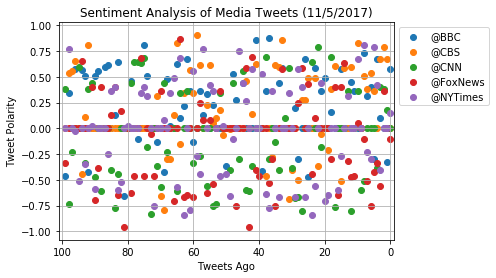

In [8]:
plt.xlim(101, -1)

#plot scatterplot using a for loop.
for user in target_users:
    dataframe = news_sentiments.loc[news_sentiments["User"] == user]
    plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"],label = user)
    
#Add legend
plt.legend(bbox_to_anchor = (1,1))

#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of Media Tweets (11/5/2017)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set a grid on the plot.
plt.grid()

plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()

In [9]:
average_sentiment = news_sentiments.groupby("User")["Compound"].mean()
average_sentiment

User
@BBC        0.168624
@CBS        0.134670
@CNN       -0.057923
@FoxNews   -0.086245
@NYTimes   -0.019457
Name: Compound, dtype: float64

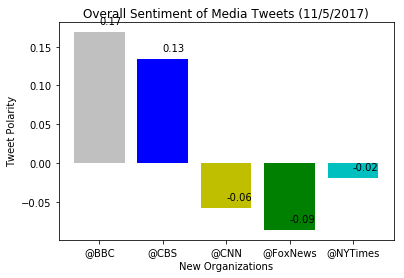

In [10]:
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index
count = 0
for sentiment in average_sentiment:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count = count + 1
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['silver', 'b', 'y', 'g', 'c'])
#Set title, x axis label, and y axis label.
plt.title("Overall Sentiment of Media Tweets (11/5/2017)")
plt.xlabel("New Organizations")
plt.ylabel("Tweet Polarity")
plt.savefig("Overall Sentiment of Media Tweets")
plt.show()